In [5]:
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import time
from prophet import Prophet
from sklearn.metrics import mean_absolute_error, mean_squared_error

fashion_df = pd.read_csv("fashion_trends_5years.csv")
fashion_df.shape

(7860, 4)

Available categories:
1. Jeans
2. Outerwear
3. Sneakers
4. Boots
5. Clothing_Brand
6. Shoe_Brand

For category 'Jeans' in 2025:
Most popular item: straight jeans
Least popular item: distressed jeans

Available keywords in 'Jeans' category:
1. skinny jeans
2. loose jeans
3. straight jeans
4. slim jeans
5. distressed jeans


11:58:35 - cmdstanpy - INFO - Chain [1] start processing
11:58:36 - cmdstanpy - INFO - Chain [1] done processing


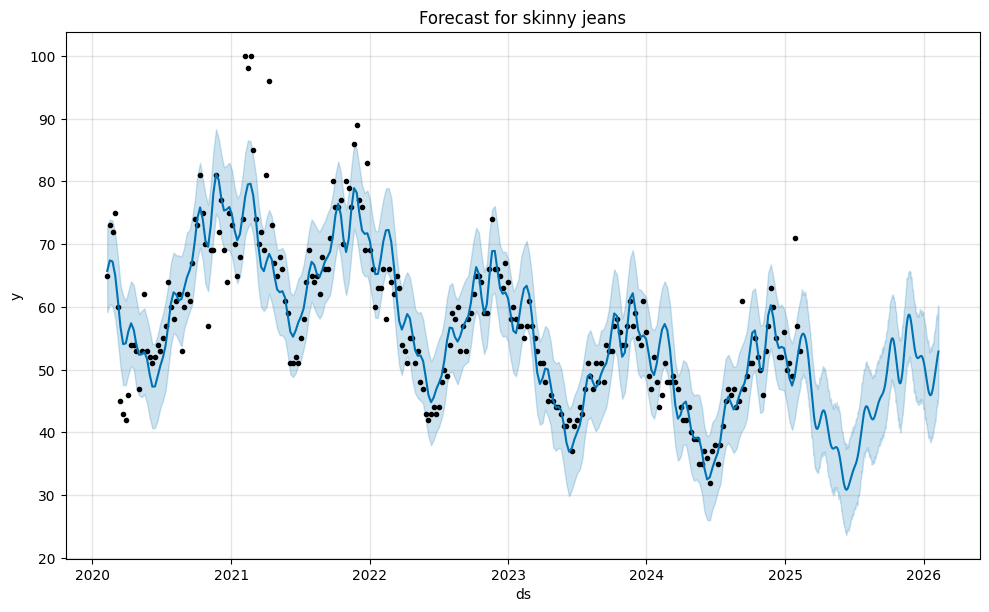

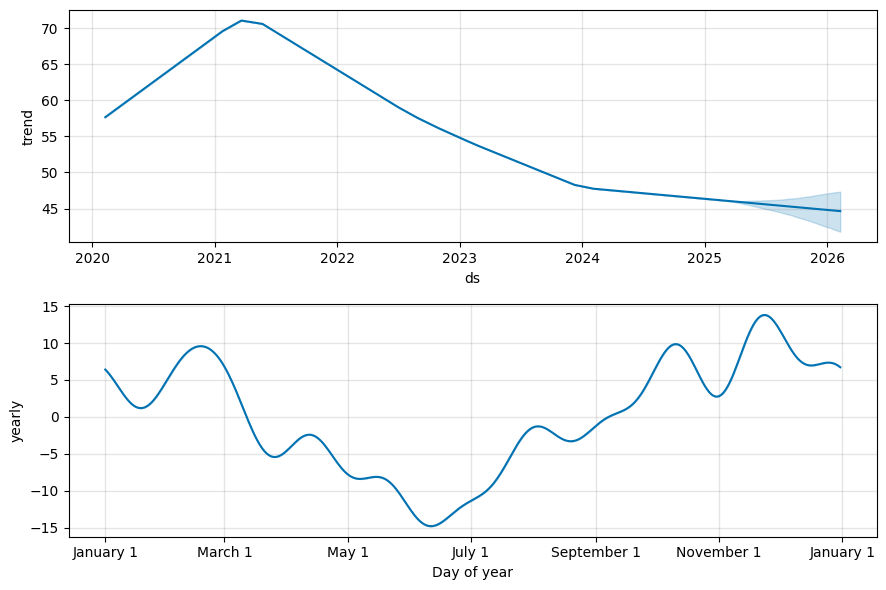


Error Metrics for skinny jeans:
Mean Absolute Error (MAE): 3.54
Mean Squared Error (MSE): 28.00
Root Mean Squared Error (RMSE): 5.29

Ending the forecast process.


In [6]:
# Load your CSV file into a DataFrame
fashion_df = pd.read_csv("fashion_trends_5years.csv")

# Convert the 'date' column to datetime format
fashion_df['date'] = pd.to_datetime(fashion_df['date'])

def forecast_trend():
    # 1. Extract unique categories from the DataFrame
    categories_in_df = fashion_df['Category'].unique()
    
    print("Available categories:")
    for i, category in enumerate(categories_in_df, 1):
        print(f"{i}. {category}")
    
    # 2. User selects a category
    selected_category_idx = int(input("Enter the number corresponding to the category you want to forecast: ")) - 1
    category_to_forecast = categories_in_df[selected_category_idx]
    
    # 3. Filter data for the selected category
    category_data = fashion_df[fashion_df['Category'] == category_to_forecast]
    
    # 4. Further filter to include only the current year's data for popularity metrics
    current_year = pd.Timestamp.now().year
    current_year_data = category_data[category_data['date'].dt.year == current_year]
    
    # 5. Group by Keyword and compute average search interest (current year only)
    keyword_popularity_current = current_year_data.groupby('Keyword')['Search Interest'].mean()
    
    # 6. Determine the most and least popular items based on current year's data
    most_popular_item = keyword_popularity_current.idxmax()
    least_popular_item = keyword_popularity_current.idxmin()
    
    print(f"\nFor category '{category_to_forecast}' in {current_year}:")
    print(f"Most popular item: {most_popular_item}")
    print(f"Least popular item: {least_popular_item}\n")
    
    # 7. List available keywords in the selected category (from all data)
    keywords_in_selected_category = category_data['Keyword'].unique()
    
    print(f"Available keywords in '{category_to_forecast}' category:")
    for i, keyword in enumerate(keywords_in_selected_category, 1):
        print(f"{i}. {keyword}")
    
    # 8. User selects a keyword to forecast
    selected_keyword_idx = int(input("Enter the number corresponding to the keyword you want to forecast: ")) - 1
    keyword_to_forecast = keywords_in_selected_category[selected_keyword_idx]
    
    # 9. Select data for the chosen keyword for forecasting
    df_keyword = fashion_df[fashion_df["Keyword"] == keyword_to_forecast][["date", "Search Interest"]]
    df_keyword = df_keyword.rename(columns={"date": "ds", "Search Interest": "y"})
    
    # 10. Initialize and fit the Prophet model
    model = Prophet()
    model.fit(df_keyword)
    
    # 11. Create a DataFrame for future predictions (forecasting the next 1 year)
    future = model.make_future_dataframe(periods=365)
    forecast = model.predict(future)
    
    # 12. Plot the forecast and seasonality components
    fig = model.plot(forecast)
    plt.title(f"Forecast for {keyword_to_forecast}")
    plt.show()
    
    fig2 = model.plot_components(forecast)
    plt.show()
    
    # 13. Merge historical data with forecast for error metrics (only for historical period)
    historical_data = df_keyword.rename(columns={"y": "actual"})
    merged_data = pd.merge(historical_data, forecast[["ds", "yhat"]], on="ds", how="left")
    merged_data = merged_data[merged_data['yhat'].notnull()]
    
    # 14. Compute error metrics
    mae = mean_absolute_error(merged_data['actual'], merged_data['yhat'])
    mse = mean_squared_error(merged_data['actual'], merged_data['yhat'])
    rmse = mse ** 0.5
    
    print(f"\nError Metrics for {keyword_to_forecast}:")
    print(f"Mean Absolute Error (MAE): {mae:.2f}")
    print(f"Mean Squared Error (MSE): {mse:.2f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.2f}\n")

def main():
    while True:
        forecast_trend()
        restart = input("Do you want to forecast another keyword? (yes/no): ").strip().lower()
        if restart != 'yes':
            print("Ending the forecast process.")
            break

# Start the main loop
main()